<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-12-30 13:41:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-12-30 13:41:12 (98.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [7]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



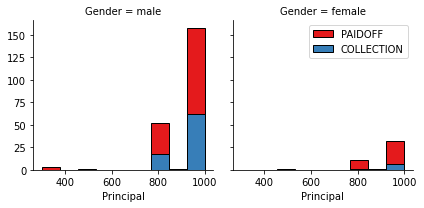

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

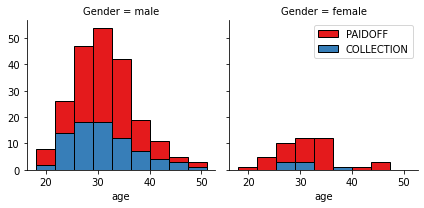

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


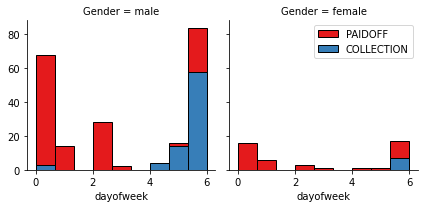

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [14]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dayofweek                  int64
weekend                    int64
dtype: object

## Convert Categorical features to numerical values


Let's look at gender:


In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [20]:
Feature.dtypes

Principal               int64
terms                   int64
age                     int64
Gender                  int64
weekend                 int64
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object

### Feature Selection


Let's define feature sets, X:


In [21]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [22]:
# Encoding of target values: PAIDOFF = 0, COLLECTION = 1
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df['loan_status'].head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

What are our lables?


In [23]:
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [25]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [26]:
# Import k-nearest neighbors library
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Train the model with an initial value of k = 5 
k = 5
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh5

KNeighborsClassifier()

In [28]:
# Prediction k = 5
yhat = neigh5.predict(X_test)
yhat[0:5]

array([0, 1, 0, 0, 0])

In [29]:
# Accuracy evaluation, K = 5
from sklearn import metrics
print("Train set Accuracy (k=5): ", metrics.accuracy_score(y_train, neigh5.predict(X_train)))
print("Test set Accuracy (k=5): ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy (k=5):  0.8152173913043478
Test set Accuracy (k=5):  0.7571428571428571


In [30]:
# Looking for the best accuracy with different values of k
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.77142857, 0.71428571, 0.77142857, 0.75714286,
       0.78571429, 0.78571429, 0.77142857, 0.75714286, 0.75714286,
       0.7       , 0.68571429, 0.7       , 0.68571429])

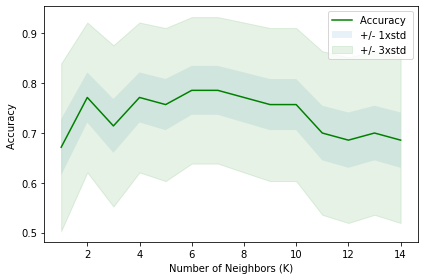

In [31]:
# now we can plot the model accuracy for different k values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [32]:
# Display results - k value for the best accuracy
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7857142857142857 with k= 6


# Decision Tree


In [33]:
from sklearn.tree import DecisionTreeClassifier
# fitting the data
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
# prediction
predLoanTree = loanTree.predict(X_test)
print (predLoanTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [36]:
# Display accuracy
print("LoanDecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predLoanTree))

LoanDecisionTrees's Accuracy:  0.7857142857142857


In [84]:
# fitting the data - max_depth 
loanTree2 = DecisionTreeClassifier(criterion="entropy")
loanTree2

DecisionTreeClassifier(criterion='entropy')

In [85]:
loanTree2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [86]:
# prediction
predLoanTree2 = loanTree2.predict(X_test)
print (predLoanTree2 [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [87]:
# Display accuracy
print("LoanDecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predLoanTree2))

LoanDecisionTrees's Accuracy:  0.7285714285714285


# Support Vector Machine


In [37]:
X = np.asarray(Feature)
X[0:5]

array([[1000,   30,   45,    0,    0,    0,    1,    0],
       [1000,   30,   33,    1,    0,    1,    0,    0],
       [1000,   15,   27,    0,    0,    0,    0,    1],
       [1000,   30,   28,    1,    1,    0,    0,    1],
       [1000,   30,   29,    0,    1,    0,    0,    1]])

In [38]:
y = np.asarray(df['loan_status'])
y [0:5]

array([0, 0, 0, 0, 0])

In [39]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [40]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 0, 0, 0, 0])

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7275882012724117

In [42]:
# Display Jaccard-Score
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7272727272727273

In [88]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train)

SVC(kernel='linear')

In [89]:
yhat2 = clf2.predict(X_test)
yhat2 [0:5]

array([0, 0, 0, 0, 0])

In [90]:
f1_score(y_test, yhat2, average='weighted')

0.6914285714285714

In [91]:
jaccard_score(y_test, yhat2,pos_label=0)

0.7857142857142857

In [92]:
clf3 = svm.SVC(kernel='sigmoid')
clf3.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [93]:
yhat3 = clf3.predict(X_test)
yhat3 [0:5]

array([0, 0, 0, 0, 0])

In [94]:
jaccard_score(y_test, yhat3,pos_label=0)

0.7205882352941176

In [95]:
f1_score(y_test, yhat3, average='weighted')

0.6953867388649997

# Logistic Regression


In [43]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
Lr

LogisticRegression(C=0.01, solver='liblinear')

In [44]:
yhat = Lr.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [45]:
yhat_prob = Lr.predict_proba(X_test)
yhat_prob

array([[0.4965762 , 0.5034238 ],
       [0.54793889, 0.45206111],
       [0.69185868, 0.30814132],
       [0.65740572, 0.34259428],
       [0.67974106, 0.32025894],
       [0.68319463, 0.31680537],
       [0.51169815, 0.48830185],
       [0.52176927, 0.47823073],
       [0.65740572, 0.34259428],
       [0.5065944 , 0.4934056 ],
       [0.66193294, 0.33806706],
       [0.50337769, 0.49662231],
       [0.75108093, 0.24891907],
       [0.6580905 , 0.3419095 ],
       [0.56248211, 0.43751789],
       [0.74239503, 0.25760497],
       [0.47642812, 0.52357188],
       [0.69549722, 0.30450278],
       [0.49833637, 0.50166363],
       [0.6804029 , 0.3195971 ],
       [0.55723012, 0.44276988],
       [0.50589815, 0.49410185],
       [0.48649667, 0.51350333],
       [0.52796502, 0.47203498],
       [0.59055306, 0.40944694],
       [0.49153558, 0.50846442],
       [0.48901585, 0.51098415],
       [0.62542353, 0.37457647],
       [0.49581577, 0.50418423],
       [0.74700365, 0.25299635],
       [0.

In [46]:
# Display Jaccard-Score
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat, pos_label=0))

Jaccard score: 0.6765


In [47]:
# Display F1-Score
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))

Avg F1-score: 0.6671


In [48]:
# Display LogLoss
from sklearn.metrics import log_loss
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))

LogLoss: : 0.58


In [97]:
Lr1 = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
Lr1

LogisticRegression(C=0.1, solver='liblinear')

In [98]:
yhat1 = Lr1.predict(X_test)
yhat1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [99]:
yhat_prob1 = Lr1.predict_proba(X_test)
yhat_prob1

array([[0.48975018, 0.51024982],
       [0.59704933, 0.40295067],
       [0.9020185 , 0.0979815 ],
       [0.87197019, 0.12802981],
       [0.90101778, 0.09898222],
       [0.89127384, 0.10872616],
       [0.53321367, 0.46678633],
       [0.56195193, 0.43804807],
       [0.87197019, 0.12802981],
       [0.52367381, 0.47632619],
       [0.8783087 , 0.1216913 ],
       [0.5306558 , 0.4693442 ],
       [0.93425325, 0.06574675],
       [0.86315409, 0.13684591],
       [0.65840976, 0.34159024],
       [0.94341236, 0.05658764],
       [0.43215132, 0.56784868],
       [0.91330149, 0.08669851],
       [0.51618401, 0.48381599],
       [0.89395865, 0.10604135],
       [0.6662696 , 0.3337304 ],
       [0.53787393, 0.46212607],
       [0.46081997, 0.53918003],
       [0.56623229, 0.43376771],
       [0.70978042, 0.29021958],
       [0.47526432, 0.52473568],
       [0.46803545, 0.53196455],
       [0.76406698, 0.23593302],
       [0.5089364 , 0.4910636 ],
       [0.95431614, 0.04568386],
       [0.

In [100]:
# Display Jaccard-Score
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat1, pos_label=0))

Jaccard score: 0.7353


In [101]:
# Display F1-Score
print("Avg F1-score: %.4f" % f1_score(y_test, yhat1, average='weighted'))

Avg F1-score: 0.7048


In [102]:
# Display LogLoss
from sklearn.metrics import log_loss
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob1))

LogLoss: : 0.50


In [103]:
Lr2 = LogisticRegression(C=1.0, solver='liblinear').fit(X_train,y_train)
Lr2

LogisticRegression(solver='liblinear')

In [104]:
yhat2 = Lr2.predict(X_test)
yhat2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [105]:
yhat_prob2 = Lr2.predict_proba(X_test)
yhat_prob2

array([[0.47670881, 0.52329119],
       [0.60687925, 0.39312075],
       [0.97139023, 0.02860977],
       [0.95749788, 0.04250212],
       [0.97122592, 0.02877408],
       [0.96653619, 0.03346381],
       [0.53726988, 0.46273012],
       [0.57714945, 0.42285055],
       [0.95749788, 0.04250212],
       [0.53438635, 0.46561365],
       [0.96066959, 0.03933041],
       [0.54012045, 0.45987955],
       [0.97956044, 0.02043956],
       [0.95175448, 0.04824552],
       [0.70981582, 0.29018418],
       [0.98721445, 0.01278555],
       [0.39731052, 0.60268948],
       [0.9767655 , 0.0232345 ],
       [0.51998052, 0.48001948],
       [0.96727422, 0.03272578],
       [0.72428693, 0.27571307],
       [0.55014561, 0.44985439],
       [0.43660352, 0.56339648],
       [0.58610434, 0.41389566],
       [0.77091016, 0.22908984],
       [0.45658581, 0.54341419],
       [0.44657309, 0.55342691],
       [0.81917404, 0.18082596],
       [0.50988201, 0.49011799],
       [0.99103422, 0.00896578],
       [0.

In [106]:
# Display Jaccard-Score
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat1, pos_label=0))

Jaccard score: 0.7353


In [107]:
# Display F1-Score
print("Avg F1-score: %.4f" % f1_score(y_test, yhat1, average='weighted'))

Avg F1-score: 0.7048


In [108]:
# Display LogLoss
from sklearn.metrics import log_loss
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob1))

LogLoss: : 0.50


# Model Evaluation using Test set


First, download and load the test set:


In [49]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-12-30 13:41:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-12-30 13:41:31 (45.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [50]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [51]:
test_df.shape

(54, 10)

### Pre-processing test set

In [52]:
# convert date fields to datetime object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [53]:
# discretize the days of week and the weekend treshold
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [54]:
# encode the Gender field
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [55]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]

In [56]:
# one hot encoding and reorganize education field
Feature_test = pd.concat([Feature_test, pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [57]:
# define the independent variable
X_t = Feature_test
X_t[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [58]:
# encode the target variable: PAIDOFF = 0, COLLECTION = 1
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_df['loan_status'].head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [59]:
# define the target variable
y_t = test_df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [60]:
# normalize data
X_t = preprocessing.StandardScaler().fit(X_t).transform(X_t)
X_t[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

### KNN model evaluation

In [61]:
# Train the KNN model with the best K found
k = 6
neighOpt = KNeighborsClassifier(n_neighbors = k).fit(X_t,y_t)
neighOpt
# Prediction
yhatOpt = neighOpt.predict(X_t)
yhatOpt[0:5]

array([0, 0, 0, 0, 0])

In [62]:
# Display Jaccard-Score
jaccard_score(y_t, yhatOpt, pos_label=0)

0.8888888888888888

In [63]:
# Display F1-Score
f1_score(y_t, yhatOpt, average='weighted')

0.9000663067159231

### Decision Tree model evaluation

In [64]:
# fitting the data
from sklearn.tree import DecisionTreeClassifier
loanTreeEv = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTreeEv

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [65]:
loanTreeEv.fit(X_t, y_t)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [66]:
# prediction
predLoanTreeEv = loanTreeEv.predict(X_t)
print (predLoanTreeEv [0:5])
print (y_t [0:5])

[0 0 1 0 0]
[0 0 0 0 0]


In [67]:
# accuracy results
print("LoanDecisionTrees's Accuracy: ", metrics.accuracy_score(y_t, predLoanTreeEv))

LoanDecisionTrees's Accuracy:  0.8333333333333334


In [68]:
# Display Jaccard-Score
print("Jaccard score: %.4f" % jaccard_score(y_t, predLoanTreeEv, pos_label=0))

Jaccard score: 0.7955


In [69]:
# Display F1-Score
print("Avg F1-score: %.4f" % f1_score(y_t, predLoanTreeEv, average='weighted'))

Avg F1-score: 0.8352


### SVM model evaluation

In [70]:
X_ta = np.asarray(Feature_test)
X_ta[0:5]

array([[1000,   30,   50,    1,    0,    1,    0,    0],
       [ 300,    7,   35,    0,    1,    0,    0,    0],
       [1000,   30,   43,    1,    1,    0,    1,    0],
       [1000,   30,   26,    0,    1,    0,    0,    1],
       [ 800,   15,   29,    0,    1,    1,    0,    0]])

In [71]:
X = preprocessing.StandardScaler().fit(X_ta).transform(X_ta)
X_ta[0:5]

array([[1000,   30,   50,    1,    0,    1,    0,    0],
       [ 300,    7,   35,    0,    1,    0,    0,    0],
       [1000,   30,   43,    1,    1,    0,    1,    0],
       [1000,   30,   26,    0,    1,    0,    0,    1],
       [ 800,   15,   29,    0,    1,    1,    0,    0]])

In [72]:
y_ta = np.asarray(test_df['loan_status'])
y_ta[0:5]


array([0, 0, 0, 0, 0])

In [73]:
from sklearn import svm
clfEv = svm.SVC(kernel='rbf')
clfEv.fit(X_ta, y_ta)

SVC()

In [74]:
yhatSvm = clfEv.predict(X_ta)
yhatSvm [0:5]

array([0, 0, 0, 0, 0])

In [75]:
# Display Jaccard-Score
print("Jaccard score: %.4f" % jaccard_score(y_ta, yhatSvm, pos_label=0))

Jaccard score: 0.7407


In [76]:
# Display F1-Score
print("Avg F1-score: %.4f" % f1_score(y_ta, yhatSvm, average='weighted'))

Avg F1-score: 0.6304


### Logistic Regression model evaluation

In [77]:
from sklearn.linear_model import LogisticRegression
LrEv = LogisticRegression(C=0.01, solver='liblinear').fit(X_ta,y_ta)
LrEv

LogisticRegression(C=0.01, solver='liblinear')

In [78]:
# Prediction
yhatLr = LrEv.predict(X_ta)
yhatLr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
# Probability prediction
yhatLr_prob = LrEv.predict_proba(X_ta)
yhatLr_prob

array([[0.86672328, 0.13327672],
       [0.81670993, 0.18329007],
       [0.80797708, 0.19202292],
       [0.66658665, 0.33341335],
       [0.74034669, 0.25965331],
       [0.76738232, 0.23261768],
       [0.68540485, 0.31459515],
       [0.72642989, 0.27357011],
       [0.72150497, 0.27849503],
       [0.80193771, 0.19806229],
       [0.67876159, 0.32123841],
       [0.81980359, 0.18019641],
       [0.71685466, 0.28314534],
       [0.77108549, 0.22891451],
       [0.75967371, 0.24032629],
       [0.73623404, 0.26376596],
       [0.8475055 , 0.1524945 ],
       [0.77761547, 0.22238453],
       [0.69221741, 0.30778259],
       [0.74081369, 0.25918631],
       [0.70754121, 0.29245879],
       [0.72209142, 0.27790858],
       [0.83615626, 0.16384374],
       [0.74219819, 0.25780181],
       [0.71344622, 0.28655378],
       [0.70295263, 0.29704737],
       [0.78670681, 0.21329319],
       [0.84377097, 0.15622903],
       [0.74356884, 0.25643116],
       [0.70602309, 0.29397691],
       [0.

In [80]:
# Display Jaccard-Score
print("Jaccard score: %.4f" % jaccard_score(y_ta, yhatLr, pos_label=0))

Jaccard score: 0.7407


In [81]:
# Display F1-Score
print("Avg F1-score: %.4f" % f1_score(y_ta, yhatLr, average='weighted'))

Avg F1-score: 0.6304


In [82]:
# Display LogLoss
print ("LogLoss: : %.2f" % log_loss(y_ta, yhatLr_prob))

LogLoss: : 0.55


In [109]:
LrEv2 = LogisticRegression(C=0.1, solver='liblinear').fit(X_ta,y_ta)
LrEv2

LogisticRegression(C=0.1, solver='liblinear')

In [110]:
yhatLr2 = LrEv2.predict(X_ta)
yhatLr2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
yhatLr_prob2 = LrEv2.predict_proba(X_ta)
yhatLr_prob2

array([[0.91215115, 0.08784885],
       [0.81763062, 0.18236938],
       [0.75812516, 0.24187484],
       [0.65630663, 0.34369337],
       [0.76511326, 0.23488674],
       [0.71457901, 0.28542099],
       [0.71014281, 0.28985719],
       [0.73294426, 0.26705574],
       [0.73783239, 0.26216761],
       [0.83572534, 0.16427466],
       [0.60413244, 0.39586756],
       [0.83634898, 0.16365102],
       [0.72179962, 0.27820038],
       [0.77848664, 0.22151336],
       [0.69108358, 0.30891642],
       [0.73891225, 0.26108775],
       [0.87737561, 0.12262439],
       [0.82575062, 0.17424938],
       [0.63571446, 0.36428554],
       [0.71469363, 0.28530637],
       [0.70510005, 0.29489995],
       [0.69123037, 0.30876963],
       [0.87434442, 0.12565558],
       [0.8182075 , 0.1817925 ],
       [0.79594281, 0.20405719],
       [0.74359655, 0.25640345],
       [0.83868753, 0.16131247],
       [0.89072282, 0.10927718],
       [0.80106424, 0.19893576],
       [0.75816362, 0.24183638],
       [0.

In [112]:
# Display Jaccard-Score
print("Jaccard score: %.4f" % jaccard_score(y_ta, yhatLr2, pos_label=0))

Jaccard score: 0.7547


In [113]:
# Display F1-Score
print("Avg F1-score: %.4f" % f1_score(y_ta, yhatLr2, average='weighted'))

Avg F1-score: 0.6718


In [114]:
# Display LogLoss
print ("LogLoss: : %.2f" % log_loss(y_ta, yhatLr_prob2))

LogLoss: : 0.50


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.8888  | 0.9000   | NA      |
| Decision Tree      | 0.7955  | 0.8352   | NA      |
| SVM                | 0.7407  | 0.6304   | NA      |
| LogisticRegression | 0.7547  | 0.6718   | 0.50    |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
